In [4]:
import xpress as xp
import pandas as pd
import numpy as np
import final_model1 as p
import importlib
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [5]:
importlib.reload(p);
data_base = p.data_all()

c:\Users\yeote\OneDrive\Desktop\Edin Math\1 MMCS\Final Project - github\mmcs_final\final_model1.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['date'] = pd.to_datetime(cleaned['date'])


In [9]:
importlib.reload(p);
from datetime import datetime, timedelta

procesed = pd.DataFrame(columns=['index', 'transaction_id', 'description', 'Amount', 'category', 'date',
       'month', 'customer_id', 'type', 'In_or_Out', 'bank_to', 'bank_from',
       'transac_prob', 'description_prob', 'priority', 'home_bank',
       'customer_prob', 'is_scam_transaction', 'fraud_type', 'case_id',
       'interbank', 'day_of_month', 'weight_bank', 'weight_priority',
       'weight_category', 'weight_day', 'transac_prob_weight',
       'description_prob_weight', 'customer_prob_weight', 'prediction',
       'to_investigate', 'chosen', 'cash_inv'])

# from_time = '2023-10-01'
to_time = '2024-12-29'

for i in range(2):
    to_time_datetime = datetime.strptime(to_time, '%Y-%m-%d')
    new_date = to_time_datetime - timedelta(days=180)
    from_time = new_date.strftime('%Y-%m-%d')
    from_time
    print(f'iteration {i}, date_from: {from_time}, date_to: {to_time}')

    comp = p.first_phase(data_base,from_time,to_time,0.03)
    procesed = pd.concat([procesed, comp])
    
    to_time_datetime = datetime.strptime(to_time, '%Y-%m-%d')
    new_date = to_time_datetime + timedelta(days=1)
    to_time = new_date.strftime('%Y-%m-%d')

procesed['net_gain'] = np.where((procesed['is_scam_transaction'] == 1) & (procesed['chosen'] == 1),procesed['Amount'] - procesed['cash_inv'],
    np.where((procesed['is_scam_transaction'] == 1) & (procesed['chosen'] == 0),-procesed['Amount'],
        np.where((procesed['is_scam_transaction'] == 0) & (procesed['chosen'] == 1),- procesed['cash_inv'],0)
    ))

iteration 0, date_from: 2024-07-02, date_to: 2024-12-29
FICO Xpress v9.2.2, Hyper, solve started 22:12:48, Nov 26, 2023
Heap usage: 435KB (peak 509KB, 94KB system)
Minimizing QP noname using up to 8 threads and up to 23GB memory, with these control settings:
OUTPUTLOG = 1
Original problem has:
         0 rows           64 cols            0 elements
      2652 qobjelem
Presolved problem has:
         0 rows           64 cols            0 elements
      2652 qobjelem
Presolve finished in 0 seconds
Heap usage: 481KB (peak 509KB, 94KB system)

Coefficient range                    original                 solved        
  Coefficients   [min,max] : [      0.0,       0.0] / [      0.0,       0.0]
  RHS and bounds [min,max] : [      0.0,       0.0] / [      0.0,       0.0]
  Objective      [min,max] : [ 6.00e+00,  2.48e+03] / [ 7.32e-04,  1.33e+02]
  Quadratic      [min,max] : [ 2.00e+00,  2.88e+05] / [ 4.53e-06,  1.42e+04]
Autoscaling applied standard scaling

Using AVX support
Cores per CPU

In [15]:
procesed['date']

0     2024-12-30
1     2024-12-30
2     2024-12-30
3     2024-12-30
4     2024-12-30
         ...    
708   2024-12-31
709   2024-12-31
710   2024-12-31
711   2024-12-31
712   2024-12-31
Name: date, Length: 1478, dtype: datetime64[ns]

In [20]:
procesed[(procesed['date']>='2024-12-31') & (procesed['date']<='2024-12-31')].groupby(['is_scam_transaction','chosen']).agg({'is_scam_transaction':'count','chosen':'count'})

is_scam_transaction  chosen
is_scam_transaction chosen                             
0.0                 -0.0                    636     636
                     1.0                     72      72
1.0                 -0.0                      2       2
                     1.0                      3       3

In [10]:
from datetime import datetime, timedelta
to_time = '2024-08-01'
to_time_datetime = datetime.strptime(to_time, '%Y-%m-%d')
new_date = to_time_datetime + timedelta(days=152)
new_date

datetime.datetime(2024, 12, 31, 0, 0)

In [16]:
importlib.reload(p);
final = p.retroactive(data_base,'2024-08-01','2024-12-31',0.03)

Using the license file found in your Xpress installation. If you want to use this license and no longer want to see this message, use the following code before using the xpress module:
  xpress.init('C:/xpressmp/bin/xpauth.xpr')
FICO Xpress v9.2.2, Hyper, solve started 18:24:52, Nov 26, 2023
Heap usage: 434KB (peak 505KB, 86KB system)
Minimizing QP noname using up to 8 threads and up to 23GB memory, with these control settings:
OUTPUTLOG = 1
Original problem has:
         0 rows           63 cols            0 elements
      2571 qobjelem
Presolved problem has:
         0 rows           63 cols            0 elements
      2571 qobjelem
Presolve finished in 0 seconds
Heap usage: 479KB (peak 505KB, 86KB system)

Coefficient range                    original                 solved        
  Coefficients   [min,max] : [      0.0,       0.0] / [      0.0,       0.0]
  RHS and bounds [min,max] : [      0.0,       0.0] / [      0.0,       0.0]
  Objective      [min,max] : [ 1.60e+01,  2.01e+03

Traceback (most recent call last):
  File "c:\Anaconda\envs\xpress_2023\lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Nicolás Talia\AppData\Local\Temp\ipykernel_35984\1825455122.py", line 2, in <module>
    final = p.retroactive(data_base,'2024-08-01','2024-12-31',0.03)
  File "c:\Users\Nicolás Talia\Desktop\mmcs\mmcs_final\final_model2.py", line 316, in retroactive
    data_test1['day_of_month'] = data_test['date'].dt.day
UnboundLocalError: local variable 'data_test' referenced before assignment

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Anaconda\envs\xpress_2023\lib\site-packages\IPython\core\interactiveshell.py", line 2120, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "c:\Anaconda\envs\xpress_2023\lib\site-packages\IPython\core\ultratb.py", line 1435, in structured_traceback
    ret

In [34]:
procesed[(procesed['date']>='2024-12-31') & (procesed['date']<='2024-12-31') & (procesed['cash_inv']!=0)]
# .to_csv('final31.csv',sep=';')

,index,transaction_id,description,Amount,category,date,month,customer_id,type,In_or_Out,...,weight_day,transac_prob_weight,description_prob_weight,customer_prob_weight,prediction,to_investigate,chosen,cash_inv,ext_investigator,net_gain


In [70]:
data = data_base[(data_base['date'] >= '2024-08-01') & (data_base['date'] <= '2024-12-31')]
data.reset_index(inplace=True)
banks = sorted(data['bank_from'].unique())
priority = sorted(data['priority'].unique())
category = sorted(data['category'].unique())
day_month = sorted(data['day_of_month'].unique())
bank_index = {}
priority_index = {}
category_index = {}
day_month_index = {}
for i in range(len(banks)):
    bank_index[banks[i]]= i

for i in range(len(priority)):
    priority_index[priority[i]]= i

for i in range(len(category)):
    category_index[category[i]]= i

for i in range(len(day_month)):
    day_month_index[day_month[i]]= i

prob = xp.problem('reg')

# Decision variable

banks_weight = np.array([xp.var(vartype=xp.continuous, name='weight_{0}'.format(banks[i]))
                    for i in range(len(banks))], dtype=xp.npvar)
priority_weight = np.array([xp.var(vartype=xp.continuous, name='weight_priority_{0}'.format(priority[i]))
                    for i in range(len(priority))], dtype=xp.npvar)
category_weight = np.array([xp.var(vartype=xp.continuous, name='weight_{0}'.format(category[i]))
                    for i in range(len(category))], dtype=xp.npvar)
day_month_weight = np.array([xp.var(vartype=xp.continuous, name='weight_day_{0}'.format(day_month[i]))
                    for i in range(len(day_month))], dtype=xp.npvar)
constant = xp.var(vartype=xp.continuous, name='constant')
transac_prob_weight = xp.var(vartype=xp.continuous, name='transac_prob_weight')
description_prob_weight = xp.var(vartype=xp.continuous, name='description_prob_weight')
customer_prob_weight = xp.var(vartype=xp.continuous, name='customer_prob_weight')

prob.addVariable(banks_weight,priority_weight,category_weight,day_month_weight,constant,transac_prob_weight,description_prob_weight,customer_prob_weight)

    
prob.setObjective(
    xp.Sum((data.loc[c,'is_scam_transaction'] - 
    (constant + banks_weight[bank_index[data.loc[c,'home_bank']]]
    + priority_weight[priority_index[data.loc[c,'priority']]]
    + category_weight[category_index[data.loc[c,'category']]]
    + day_month_weight[day_month_index[data.loc[c,'day_of_month']]]
    + transac_prob_weight*data.loc[c,'transac_prob']
    + description_prob_weight*data.loc[c,'description_prob']
    + customer_prob_weight*data.loc[c,'customer_prob']
    ))**2
    for c in range(data.shape[0]))
    ,sense = xp.minimize)

prob.write('reg','lp')

prob.solve()

print(f'First optimization ok with objective function value is {prob.getObjVal()}') 



FICO Xpress v9.2.2, Hyper, solve started 19:06:51, Nov 26, 2023
Heap usage: 434KB (peak 505KB, 264KB system)
Minimizing QP noname using up to 8 threads and up to 23GB memory, with these control settings:
OUTPUTLOG = 1
Original problem has:
         0 rows           63 cols            0 elements
      2571 qobjelem
Presolved problem has:
         0 rows           63 cols            0 elements
      2571 qobjelem
Presolve finished in 0 seconds
Heap usage: 479KB (peak 505KB, 264KB system)

Coefficient range                    original                 solved        
  Coefficients   [min,max] : [      0.0,       0.0] / [      0.0,       0.0]
  RHS and bounds [min,max] : [      0.0,       0.0] / [      0.0,       0.0]
  Objective      [min,max] : [ 1.60e+01,  2.01e+03] / [ 4.03e-03,  6.03e+02]
  Quadratic      [min,max] : [ 2.00e+00,  2.47e+05] / [ 4.29e-05,  5.78e+04]
Autoscaling applied standard scaling

Using AVX support
Cores per CPU (CORESPERCPU): 8
Barrier starts after 0 seconds, usin

In [37]:
table = pd.read_csv('final_result.csv',sep=';')

<Axes: xlabel='date'>

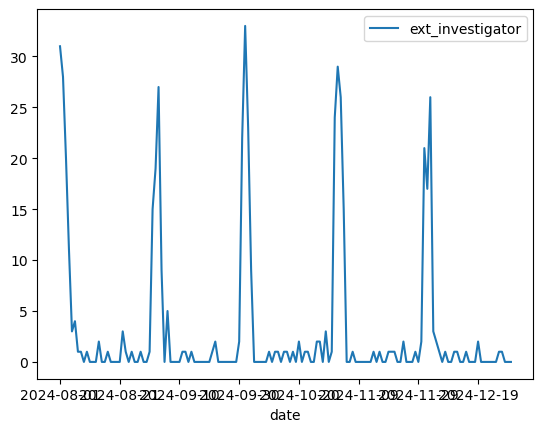

In [46]:
table['ext_investigator'] = round(table['ext_investigator'],0)
# table['ext_investigator'].unique()
table.groupby('date').agg({'ext_investigator':'sum'}).plot()

<Axes: xlabel='date'>

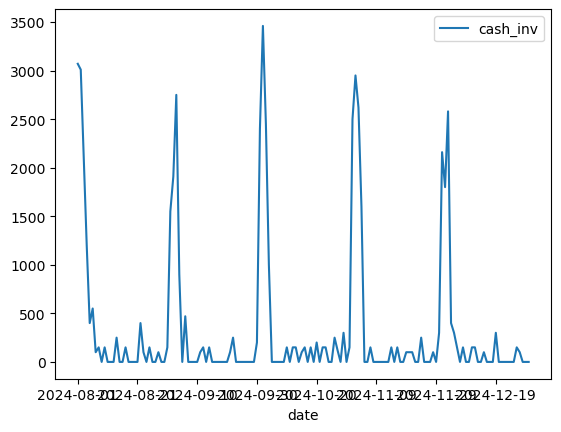

In [47]:
table.groupby('date').agg({'cash_inv':'sum'}).plot()